In [29]:
# Importing important librararie
import pymongo
import pprint
import json
import warnings
import pandas as pd, numpy as np
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [11]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [3]:
df = pd.read_csv("data/cleaned.csv")
df.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1, inplace=True)
df.head()

,timestamp,Auxiliary Boilers Feed Water Header Pressure,Heat Recovery System Header Mass Flow,Heat Recovery System Header Mass Flow.1,Lube Oil Tank Temperature,Motor Current Phase A,Motor Voltage,Pump Journal 1 Bearing Temperature,Pump Journal 2 Bearing Temperature,Pump Radial Bearing Vibration,Pump Shaft Speed,Pump Suction Pressure 1,Pump Suction Pressure 2,Pump Suction Strainer Differential Pressure,Pump Suction Temperature,Pump Thrust Bearing Temperature 1
0,2018-01-01 00:02:30,1292.358276,303325.5625,304403.8125,76.793610,147.000000,4235.593262,137.116119,144.290588,9.771034,3589.286377,24.972260,16.881464,0.274836,226.737091,98.086472
1,2018-01-01 00:15:45,1280.951782,303501.2188,306518.3438,75.740501,147.000000,4237.000000,137.001038,144.234497,9.445200,3589.314209,24.914534,16.850445,0.291397,226.697098,98.296577
2,2018-01-01 00:23:30,1301.558716,303439.5625,304557.9375,76.408760,146.000000,4230.842773,136.933716,144.201675,9.469283,3589.330566,25.057545,16.832302,0.267696,226.673706,98.419472
3,2018-01-01 00:25:00,1277.910767,303409.8125,305721.0313,76.574921,145.693817,4243.306152,136.920685,144.195328,9.759820,3589.333740,25.000223,16.828791,0.264931,226.669174,98.443253
4,2018-01-01 00:38:00,1291.603882,303493.1250,303782.2188,77.575714,147.308044,4233.544922,136.807770,144.140289,9.620083,3589.361084,24.901915,16.822590,0.274948,226.629944,98.862801


## Splitting Data

In [4]:
# Defining X and y variables
X = df.drop(['timestamp', 'Pump Radial Bearing Vibration'],axis=1)
y = df['Pump Radial Bearing Vibration']

In [7]:
# Using only a sample of data for train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.15,test_size=0.45 ,random_state=42)

## Initial Baseline Modelling- Linear Regression

In [9]:
normalized_lr = Pipeline([('scaler', MinMaxScaler()), ('Lr', LinearRegression(n_jobs=-1))])

sbs = sfs(normalized_lr, k_features=11, forward=False, floating=False, scoring='r2', cv=3, verbose=2, n_jobs=-1)

sbs = sbs.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    2.5s remaining:    2.5s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    4.0s finished

[2022-07-24 12:43:48] Features: 13/11 -- score: 0.6345453724523011[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    2.0s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.3s finished

[2022-07-24 12:43:52] Features: 12/11 -- score: 0.6344953552828599[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.7s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.9s finished

[2022-07-24 12:43:55] Features: 11/11 -- score: 0.6344017001655035

In [10]:
sbs.k_feature_names_

('Heat Recovery System Header Mass Flow.1',
 'Motor Current Phase A',
 'Motor Voltage',
 'Pump Journal 1 Bearing Temperature',
 'Pump Journal 2 Bearing Temperature',
 'Pump Shaft Speed',
 'Pump Suction Pressure 1',
 'Pump Suction Pressure 2',
 'Pump Suction Strainer Differential Pressure',
 'Pump Suction Temperature',
 'Pump Thrust Bearing Temperature 1')

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X[list(sbs.k_feature_names_)],y,train_size=0.15,test_size=0.45 ,random_state=42)

In [14]:
pipe = Pipeline([('poly_features',PolynomialFeatures(2, include_bias=False, interaction_only=True)),
                        ('scaler', MinMaxScaler()), 
                        ('Lr', LinearRegression(n_jobs=-1))])

model = pipe.fit(X_train, y_train)

In [18]:
y_pred = model.predict(X_train)
regression_results(y_train.values, y_pred)

explained_variance:  0.7217
mean_squared_log_error:  0.003
r2:  0.7217
MAE:  0.426
MSE:  0.2971
RMSE:  0.545


In [19]:
y_pred_test = model.predict(X_test)
regression_results(y_test.values, y_pred_test)

explained_variance:  0.7219
mean_squared_log_error:  0.003
r2:  0.7219
MAE:  0.4253
MSE:  0.2968
RMSE:  0.5448


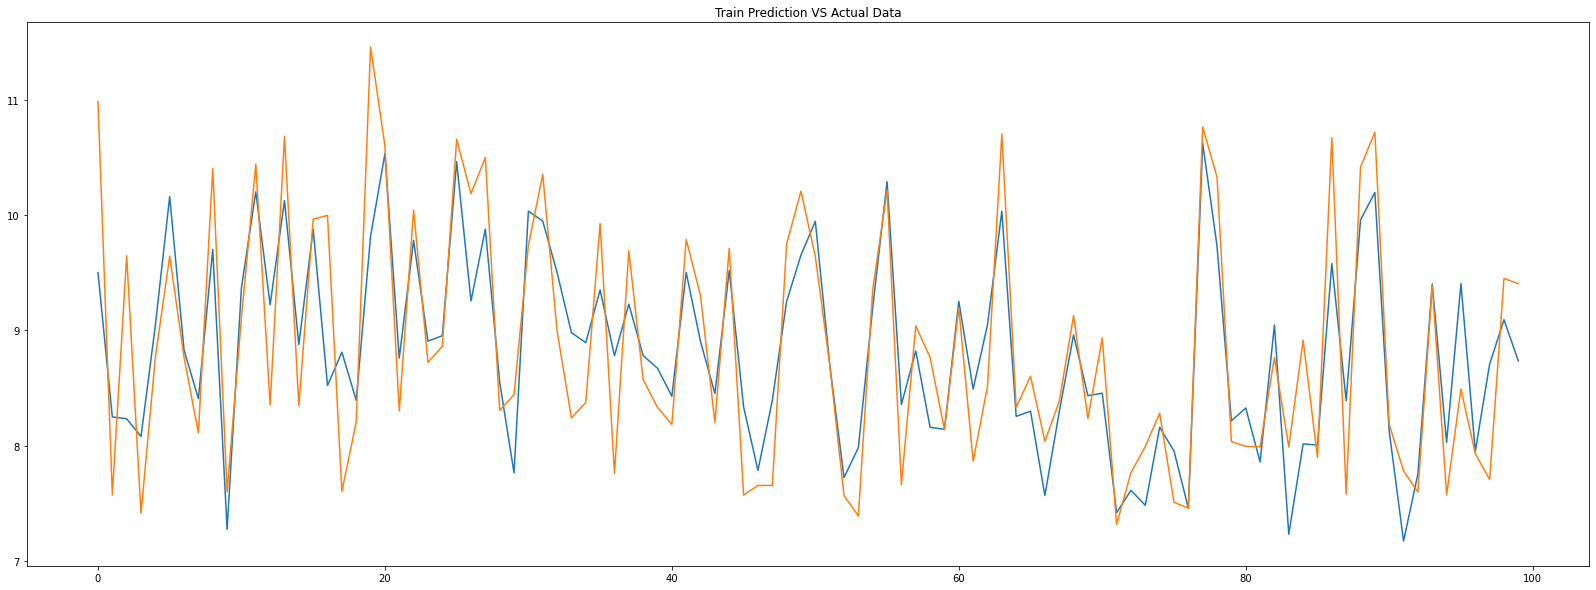

In [21]:
plt.figure(figsize=[28,10])
plt.plot(y_pred[:100])
plt.plot(y_train.values[:100])
plt.title("Train Prediction VS Actual Data")
plt.show()

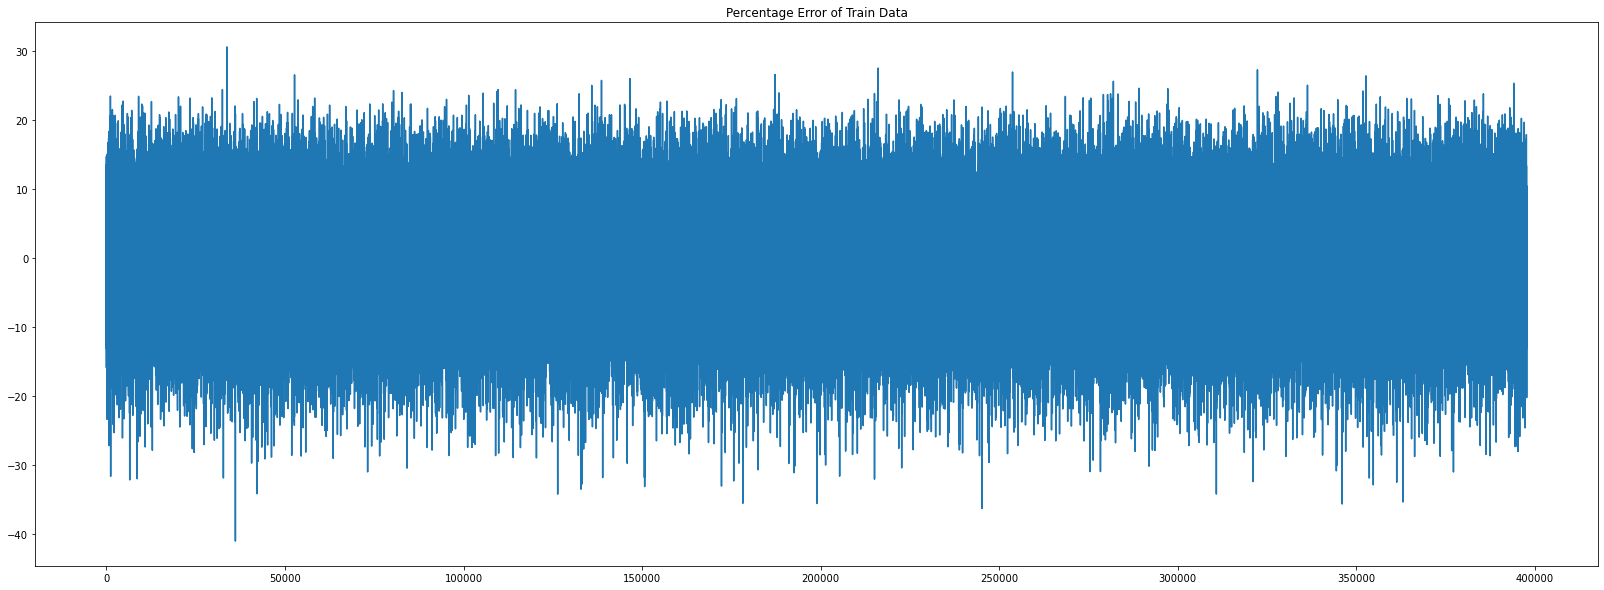

In [24]:
perc_error = (y_train.values - y_pred)/y_train.values * 100
plt.figure(figsize=[28,10])
plt.plot(perc_error)
plt.title("Percentage Error of Train Data")
plt.show()

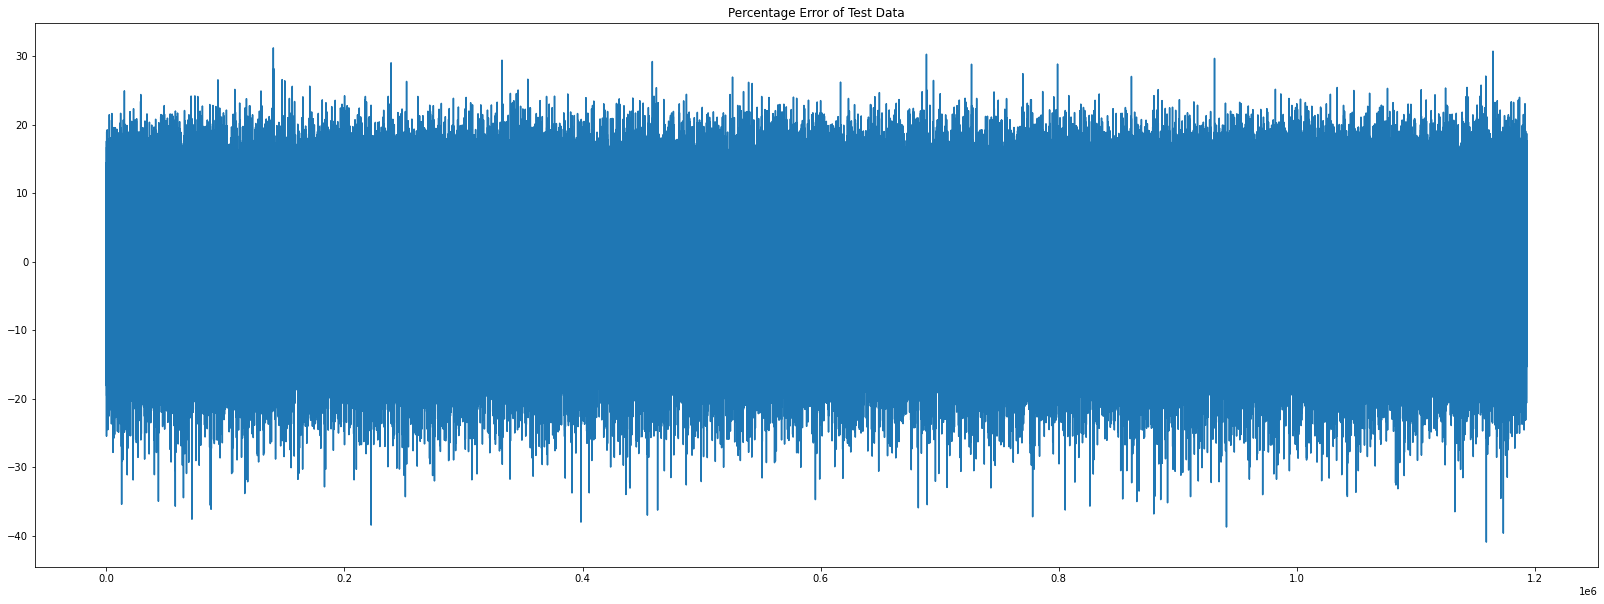

In [25]:
perc_error = (y_test.values - y_pred_test)/y_test.values * 100
plt.figure(figsize=[28,10])
plt.plot(perc_error)
plt.title("Percentage Error of Test Data")
plt.show()

Although the evaluation matrix of train and test data are very similar the errror plots are easily breaching +/-20 threshold. This might be a sign of underfitting.

## XGBoost Modelling

### Feature Selection

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

In [30]:
model = xgb.XGBRegressor( 
                    max_depth = 8,
                    min_child_weight = 10,
                    learning_rate = 0.07,
                    n_jobs=-1,
                    subsample = 0.8,
                    # colsample_bytree=study.best_params['xg_colsample_bytree'],
                    objective='reg:squarederror',
                    n_estimators=90,
                    tree_method='hist'
                    )

eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mae", eval_set=eval_set, verbose=True)


[0]	validation_0-mae:7.77602
[1]	validation_0-mae:7.23172
[2]	validation_0-mae:6.72552
[3]	validation_0-mae:6.25476
[4]	validation_0-mae:5.81698
[5]	validation_0-mae:5.40981
[6]	validation_0-mae:5.03116
[7]	validation_0-mae:4.67899
[8]	validation_0-mae:4.35146
[9]	validation_0-mae:4.04688
[10]	validation_0-mae:3.76362
[11]	validation_0-mae:3.50020
[12]	validation_0-mae:3.25520
[13]	validation_0-mae:3.02733
[14]	validation_0-mae:2.81540
[15]	validation_0-mae:2.61829
[16]	validation_0-mae:2.43504
[17]	validation_0-mae:2.26459
[18]	validation_0-mae:2.10610
[19]	validation_0-mae:1.95866
[20]	validation_0-mae:1.82160
[21]	validation_0-mae:1.69416
[22]	validation_0-mae:1.57569
[23]	validation_0-mae:1.46565
[24]	validation_0-mae:1.36347
[25]	validation_0-mae:1.26859
[26]	validation_0-mae:1.18058
[27]	validation_0-mae:1.09897
[28]	validation_0-mae:1.02337
[29]	validation_0-mae:0.95344
[30]	validation_0-mae:0.88872
[31]	validation_0-mae:0.82896
[32]	validation_0-mae:0.77382
[33]	validation_0-ma

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=10,
             missing=nan, monotone_constraints='()', n_estimators=90, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [31]:
feature_importance = model.get_booster().get_score(importance_type= "gain")
feature_importance

{'Auxiliary Boilers Feed Water Header Pressure': 1.9499975442886353,
 'Heat Recovery System Header Mass Flow': 128.97808837890625,
 'Heat Recovery System Header Mass Flow.1': 140.85377502441406,
 'Lube Oil Tank Temperature': 1622.9287109375,
 'Motor Current Phase A': 183.65878295898438,
 'Motor Voltage': 1252.4349365234375,
 'Pump Journal 1 Bearing Temperature': 67.7179946899414,
 'Pump Journal 2 Bearing Temperature': 124.65560913085938,
 'Pump Shaft Speed': 364.61810302734375,
 'Pump Suction Pressure 1': 895.7115478515625,
 'Pump Suction Pressure 2': 296.4747009277344,
 'Pump Suction Strainer Differential Pressure': 221.0781707763672,
 'Pump Suction Temperature': 64.78948974609375,
 'Pump Thrust Bearing Temperature 1': 499.4141845703125}

In [32]:
feature_score = pd.DataFrame({'feature_name':feature_importance.keys() , 
                            'gain':feature_importance.values()}).sort_values("gain", ascending=False).reset_index(drop=True)
feature_score

,feature_name,gain
0,Lube Oil Tank Temperature,1622.928711
1,Motor Voltage,1252.434937
2,Pump Suction Pressure 1,895.711548
3,Pump Thrust Bearing Temperature 1,499.414185
4,Pump Shaft Speed,364.618103
5,Pump Suction Pressure 2,296.474701
6,Pump Suction Strainer Differential Pressure,221.078171
7,Motor Current Phase A,183.658783
8,Heat Recovery System Header Mass Flow.1,140.853775
9,Heat Recovery System Header Mass Flow,128.978088


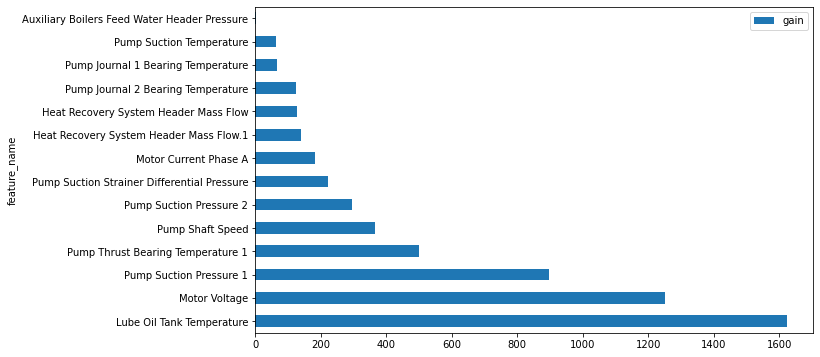

In [33]:
feature_score.plot(x='feature_name', y='gain', kind='barh', figsize=[10,6])
plt.show()

In [35]:
selected_cols = feature_score["feature_name"].values[:11]
selected_cols

array(['Lube Oil Tank Temperature', 'Motor Voltage',
       'Pump Suction Pressure 1', 'Pump Thrust Bearing Temperature 1',
       'Pump Shaft Speed', 'Pump Suction Pressure 2',
       'Pump Suction Strainer Differential Pressure',
       'Motor Current Phase A', 'Heat Recovery System Header Mass Flow.1',
       'Heat Recovery System Header Mass Flow',
       'Pump Journal 2 Bearing Temperature'], dtype=object)

## Modelling and tuning on selected columns

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X[selected_cols], y, train_size=0.6, random_state=42)

In [37]:
regressor = xgb.XGBRegressor(tree_method='hist', objective='reg:squarederror', early_stopping_rounds=10)

### Attempting Parameter Tuning Using Random CV

In [38]:
## Hyper Parameter Optimization


n_estimators = [ 90, 100, 120, 130, 150]
max_depth = [7, 8, 9, 10, 11, 12]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.07, 0.08,0.1,0.12]
min_child_weight = [5,6,7,8,9]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster
    }

In [39]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
            
eval_set = [(X_test, y_test)]
random_cv.fit(X_train,y_train, eval_set=eval_set)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
random_cv.best_estimator_

In [ ]:
best_max_depth = random_cv.best_estimator_.max_depth
best_n_est = random_cv.best_estimator_.n_estimators
best_min_weight = random_cv.best_estimator_.min_child_weight
best_lr = random_cv.best_estimator_.learning_rate

regressor=xgboost.XGBRegressor(
             early_stopping_rounds=10,
             learning_rate=best_lr, 
             max_depth=best_max_depth, 
             min_child_weight=best_min_weight,
             n_estimators=best_n_est,
             n_jobs=-1,
             tree_method='hist', 
             objective='reg:squarederror'
             )
             
eval_set = [(X_test, y_test)]
regressor.fit(X_train,y_train, eval_set=eval_set)